# Model Validation

This notebook presents allows to run the model validation. Therefore first observation data is split into training and validation data sets. Model parameters are estimated from the training data set and the calibrated and uncalibrated models are run. Then discrepancy is computed using error metrics. The results are plotted to evaluate the predictive values of both models.  

In [1]:
# import packages
import pandas
import numpy as np
import time
import agentpy as ap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get training data and compute parameters for model
def get_estimated_parameter(indices):
    training = indices.loc[(indices['number'] == 3) | (indices['number'] == 11)]
    training_mean_veg_speed = np.mean(training["mean_veg_speed"])
    training_sd_veg_speed = np.mean(training["sd_veg_speed"])
    training_mean_open_speed = np.mean(training["mean_open_speed"])
    training_sd_open_speed = np.mean(training["sd_open_speed"])
    return training_mean_veg_speed, training_sd_veg_speed, training_mean_open_speed, training_sd_open_speed
 
observation_indices = pandas.read_csv("validation_data/observation_indices.csv")
veg_speed_median, veg_speed_sd, open_speed_median, open_speed_sd = get_estimated_parameter(observation_indices)

print("Shrub Speed Mean: " + str(veg_speed_median))
print("Shrub Speed SD: " + str(veg_speed_sd))
print("Sand Speed Mean: " + str(open_speed_median))
print("Sand Speed SD: " + str(open_speed_sd))

Shrub Speed Mean: 0.11311061492925882
Shrub Speed SD: 0.09068941944472232
Sand Speed Mean: 0.1938655864598388
Sand Speed SD: 0.08409047054474418


In [3]:
# load the model 
%run ./Model_Submission.ipynb

Run the model with calibrated parameters for 10 iterations with 10 agents per iteration:

In [4]:
# calibrated model parameters
calibrated_parameters = {
    'agents': 10,
    'timestep': 1/50,
    'foraging_runs': 3,
    'epoch_time': int(time.time()),
    'seed': 48,  
    'veg_speed_median': veg_speed_median, # mean of means ant 03 (4 tracks) & 11 (3 tracks)
    'veg_speed_sd': veg_speed_sd,  # mean of sd ant 03 (4 tracks) & 11 (3 tracks)
    'open_speed_median': open_speed_median, # mean of means ant 03 (4 tracks) & 11 (3 tracks)
    'open_speed_sd': open_speed_sd, # mean of sd ant 03 (4 tracks) & 11 (3 tracks)
    'speed_impact': 1,
    'veg_speed_impact': 1,
    # steering coefficient
    'kphi': 0.12,
    'kphi_impact': 1,
    # random walk (signal noise)
    'sigma_impact': 1,
    'model_sigma2': 0.24,
    # environemnt
    'nest': str(complex(0,0)),
    'context': True,
    'env_ant': ap.Values(5, 6),
    'cookie_mean': 8, 
    'cookie_sd': 0,
    'min_feeder_dist': 2,
    # belief vector fields
    'pi_k': 0.68,
    'place_k': 7.5,
    'place_d': 4,   
    # initial heading
    'iphi_mean': 0.5*np.pi,
    'iphi_sd': 0.2,
    # plot related
    'plot_trjs': False,
    'spacing': 2.0,
    'plot_bvf': False
}

# Run the model for 10 iterations  
sample = ap.Sample(calibrated_parameters, randomize=False)
# Perform experiment
exp = ap.Experiment(CADAModel, sample, iterations=10, record=False)
results = exp.run(n_jobs=-1, verbose=10)
results.save(exp_name='E', exp_id=calibrated_parameters['epoch_time'], path='Experiments', display=True)

Scheduled runs: 20


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   13.7s remaining:   20.5s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   21.3s remaining:   17.4s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   22.9s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   27.7s remaining:    4.9s


Experiment finished
Run time: 0:00:29.269258
Data saved to Experiments/E_1682768327


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.3s finished


Run the model with **UNCALIBRATED** parameters for 10 iterations with 10 agents per iteration:

In [5]:
# uncalibrated model parameters (context = False, speed = fixed)
uncalibrated_parameters = {
    'agents': 10,
    'timestep': 1/50,
    'foraging_runs': 3,
    'epoch_time': int(time.time()),
    'seed': 48,    
    # speed
    'veg_speed_median': 0.03,
    'veg_speed_sd': 0,
    'open_speed_median': 0.03, # mean of means ant 03 (4 tracks) & 11 (3 tracks)
    'open_speed_sd': 0,
    'speed_impact': 1,
    'veg_speed_impact': 1,
    # steering coefficient
    'kphi': 0.12,
    'kphi_impact': 1,
    # random walk (signal noise)
    'sigma_impact': 1,
    'model_sigma2': 0.24,
    # environemnt
    'nest': str(complex(0,0)),
    'context': False,
    'env_ant': ap.Values(5, 6),
    'cookie_mean': 8, 
    'cookie_sd': 0,
    'min_feeder_dist': 2,
    # belief vector fields
    'pi_k': 0.68,
    'place_k': 7.5,
    'place_d': 4,   
    # initial heading
    'iphi_mean': 0.5*np.pi,
    'iphi_sd': 0.2,
    # plot related
    'plot_trjs': False,
    'spacing': 2.0,
    'plot_bvf': False
}

# Run the model for 10 iterations  
sample = ap.Sample(uncalibrated_parameters, randomize=False)
# Perform experiment
exp = ap.Experiment(CADAModel, sample, iterations=10, record=False)
results = exp.run(n_jobs=-1, verbose=10)
results.save(exp_name='E', exp_id=uncalibrated_parameters['epoch_time'], path='Experiments', display=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Scheduled runs: 20


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:  5.1min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  6.3min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  6.5min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  8.3min remaining:  1.5min


Experiment finished
Run time: 0:09:13.892160
Data saved to Experiments/E_1682768356


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.2min finished


After the model runs are complete, indices of the outputs need to be created. Therefore we use R scripts:

In [6]:
! Rscript ./model_ouput_to_indices.r E_{calibrated_parameters['epoch_time']}

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167
Loading required package: ggplot2
[1] "Pack 0 done."
[1] "Indices calculated and saved to file (Experiments/E_1682768327/indices/indices_no_resample.csv)"


In [7]:
! Rscript ./model_ouput_to_indices.r E_{uncalibrated_parameters['epoch_time']}

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE
You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167
Loading required package: ggplot2
[1] "Pack 0 done."
[1] "Indices calculated and saved to file (Experiments/E_1682768356/indices/indices_no_resample.csv)"


All set and done! Now the model can be validated and results can be visualized. 

In [8]:
# error metrics
def rmse(predictions, observations):
    return np.sqrt(((predictions - observations) ** 2).mean())

def ae(predictions, observations):
    return abs(predictions - observations).mean()

def nae(predictions, observations, group_sd):
    return abs(predictions - observations).mean()/group_sd

def simple_error(predictions, observations):
    return ((predictions - observations).mean())

def norm_rmse(predictions, observations, group_mean):
    return np.sqrt(((predictions - observations) ** 2).mean())/group_mean

In [9]:
# split indices by motivational state and return mean indicies 
def get_mean_indices_by_motivation(indices):
    searching_indices = indices.loc[indices["behavior"] == "initial search"]
    homing_indices = indices.loc[indices["behavior"] == "homing"]
    oriented_search_indices = indices.loc[indices["behavior"] == "oriented search"]

    sim = searching_indices.mean(numeric_only=True)
    sim_df = pandas.DataFrame(sim)
    sim_df = sim_df.T
    sim_df['behavior']='searching'
    sim_df = sim_df.set_index('behavior')

    kim = oriented_search_indices.mean(numeric_only=True)
    kim_df = pandas.DataFrame(kim)
    kim_df = kim_df.T
    kim_df['behavior']='oriented_search'
    kim_df = kim_df.set_index('behavior')

    him = homing_indices.mean(numeric_only=True)
    him_df = pandas.DataFrame(him)
    him_df = him_df.T
    him_df['behavior']='homing'
    him_df = him_df.set_index('behavior')

    reporters = pandas.concat([sim_df, kim_df, him_df])
    return(reporters)

# get mean indices independent of motivation state
def get_mean_indices(indices):
    all_mean = indices.mean(numeric_only=True)
    all_mean_df = pandas.DataFrame(all_mean)
    all_mean_df = all_mean_df.T
    all_mean_df['behavior']='all'
    all_mean_df = all_mean_df.set_index('behavior')
    return(all_mean_df)

# get SD of indices independent of motivation state
def get_sd_indices(indices):
    all_mean = indices.std(numeric_only=True)
    all_mean_df = pandas.DataFrame(all_mean)
    all_mean_df = all_mean_df.T
    all_mean_df['behavior']='all'
    all_mean_df = all_mean_df.set_index('behavior')
    return(all_mean_df)

# split observation data into training and validation sets
def split_observation(indices):
    training = indices.loc[(indices['number'] == 3) | (indices['number'] == 11) ]
    validation = indices.loc[(indices['number'] == 5) | (indices['number'] == 6) ]
    return validation, training

# calculate total rmse and simple errors for motivational states
def calc_all_model_errors(predictions, observations, metric):
    rmse_total = rmse(predictions[metric], observations[metric])
    se_initial = simple_error(predictions[metric][0], observations[metric][0])
    se_oriented = simple_error(predictions[metric][1], observations[metric][1])
    se_homing = simple_error(predictions[metric][2], observations[metric][2])
    return [metric, rmse_total, se_initial, se_oriented, se_homing]

# calculate total nrmse and normalized absolute errors for motivational states
def calc_all_norm_model_errors(predictions, observations, metric, total_sds, motivation_sds):
    nrmse_total = norm_rmse(predictions[metric], observations[metric], total_sds[metric][0])
    nae_initial = nae(predictions[metric][0], observations[metric][0], motivation_sds[metric][0])
    nae_oriented = nae(predictions[metric][1], observations[metric][1], motivation_sds[metric][1])
    nae_homing = nae(predictions[metric][2], observations[metric][2], motivation_sds[metric][2])
    return [metric, nrmse_total, nae_initial, nae_oriented, nae_homing]

In [10]:
# plot data as bar charts
def plot_bars_rmse(df, calibrated, uncalibrated, xlabel, output_path, log, lim=(0,10000), relative=True):
    sns.set()
    f, axis = plt.subplots(figsize=(12,4))
    if(log):
        if(lim == "symlog"):
            ax = df[[calibrated,uncalibrated]].plot.barh(ax=axis,logx=True)
            plt.xscale('symlog')
            ax.set_xlim(-10000, 10000)
            ax.margins(x=0.09)
        else:
            ax = df[[calibrated,uncalibrated]].plot.barh(ax=axis, logx=True, xlim=lim)
    elif(lim == 0):
        ax = df[[calibrated,uncalibrated]].plot.barh(ax=axis, )
    else:
        ax = df[[calibrated,uncalibrated]].plot.barh(ax=axis, xlim=lim)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')
    if(relative):
        ax.set_yticklabels(["Mean speed", "SD speed", "Straightness", "EMax", "Mean DC", "SD DC", "Rel. shrub time"], fontsize=15)
    else:
        ax.set_yticklabels(["Mean speed ($ms^{-1}$)", "SD speed ($ms^{-1}$)", "Straightness", "EMax", "Mean DC ($°s^{-1}$)", "SD DC ($°s^{-1}$)", "Rel. shrub time"], fontsize=15)
    ax.legend(labels=['Calibrated', 'Uncalibrated'])
    ax.set_ylabel('Output metric', fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    plt.tight_layout()
    plt.savefig(output_path)

In [11]:
# get indices of calibrated and uncalibrated model 
uncalibrated_model_indices = pandas.read_csv("Experiments/E_" + str(uncalibrated_parameters['epoch_time']) + "/indices/indices_no_resample.csv")
calibrated_model_indices = pandas.read_csv("Experiments/E_" + str(calibrated_parameters['epoch_time']) + "/indices/indices_no_resample.csv")
observation_indices = pandas.read_csv("validation_data/observation_indices.csv")
observation_data, training_data = split_observation(observation_indices)

calibrated_predictions = get_mean_indices_by_motivation(calibrated_model_indices)
observations = get_mean_indices_by_motivation(observation_data)
uncalibrated_predictions = get_mean_indices_by_motivation(uncalibrated_model_indices)
all_means = get_mean_indices(observation_indices)
all_sd = get_sd_indices(observation_indices)
sd_by_motiv = get_mean_indices_by_motivation(observation_indices)


In [12]:
# calculate all errors
rmse_cali_list =[]
rmse_uncali_list =[]
nrmse_cali_list =[]
nrmse_uncali_list =[]
sdnrmse_cali_list =[]
sdnrmse_uncali_list =[]

for x in ['mean_speed', 'sd_speed', 'straightness', 'Emax', 'directional_change_mean', 'directional_change_sd', 'relative_vegetation_time']:
    rmse_cali_list.append(calc_all_model_errors(calibrated_predictions, observations, x))
    rmse_uncali_list.append(calc_all_model_errors(uncalibrated_predictions, observations, x))
    sdnrmse_cali_list.append(calc_all_norm_model_errors(calibrated_predictions, observations, x, all_sd, sd_by_motiv))
    sdnrmse_uncali_list.append(calc_all_norm_model_errors(uncalibrated_predictions, observations, x, all_sd, sd_by_motiv))

In [13]:
# non normalized errors
rmse_cali_df = pandas.DataFrame(rmse_cali_list, columns=['metric', 'total_rmse', 'rmse_searching', 'rmse_oriented', 'rmse_homing']).set_index('metric')
rmse_uncali_df = pandas.DataFrame(rmse_uncali_list, columns=['metric',  'total_rmse', 'rmse_searching', 'rmse_oriented', 'rmse_homing']).set_index('metric')
rmse_cali_df = rmse_cali_df.add_prefix('calibrated_')
rmse_uncali_df = rmse_uncali_df.add_prefix('uncalibrated_')
df = pandas.merge(rmse_cali_df, rmse_uncali_df, on='metric')

# non normalized errors
sdnrmse_cali_df = pandas.DataFrame(sdnrmse_cali_list, columns=['metric', 'total_sdnrmse', 'sdnrmse_searching', 'sdnrmse_oriented', 'sdnrmse_homing']).set_index('metric')
sdnrmse_uncali_df = pandas.DataFrame(sdnrmse_uncali_list, columns=['metric', 'total_sdnrmse', 'sdnrmse_searching', 'sdnrmse_oriented', 'sdnrmse_homing']).set_index('metric')
sdnrmse_cali_df = sdnrmse_cali_df.add_prefix('calibrated_')
sdnrmse_uncali_df = sdnrmse_uncali_df.add_prefix('uncalibrated_')
sdnrmse_df = pandas.merge(sdnrmse_cali_df, sdnrmse_uncali_df, on='metric')

### Total Errors - RMSE and NRMSE

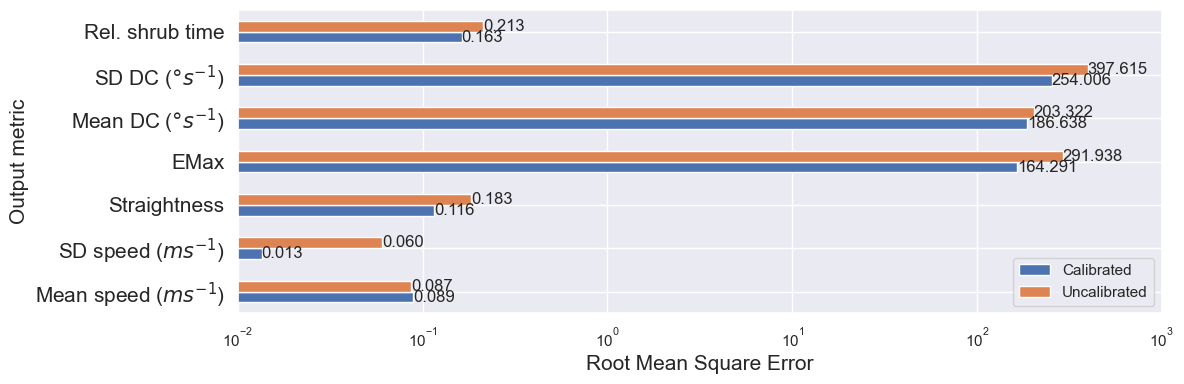

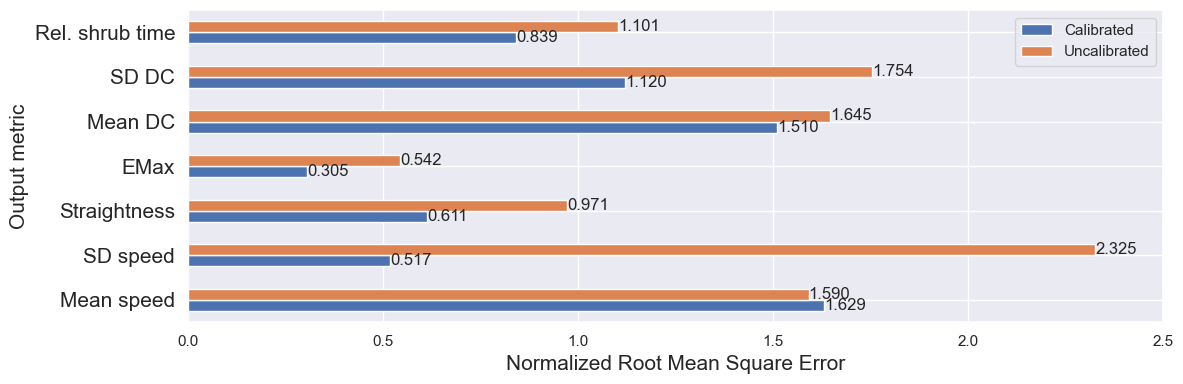

In [14]:
# plot total errors
plot_bars_rmse(df,'calibrated_total_rmse','uncalibrated_total_rmse', 'Root Mean Square Error', 'validation_results/total_rmse.pdf', True, (0.01,1000), relative=False)
plot_bars_rmse(sdnrmse_df, 'calibrated_total_sdnrmse','uncalibrated_total_sdnrmse', 'Normalized Root Mean Square Error', 'validation_results/total_nrmse_sd.pdf', False, (0,2.5))

### Initial Search Errors

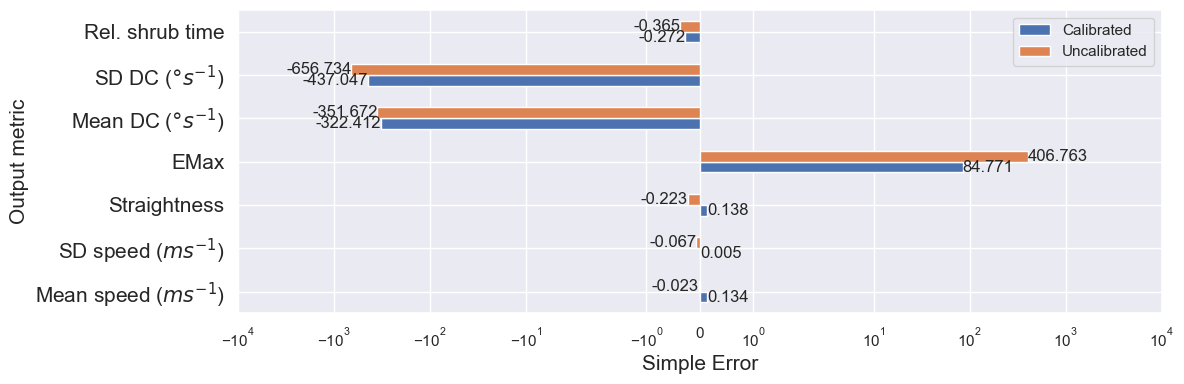

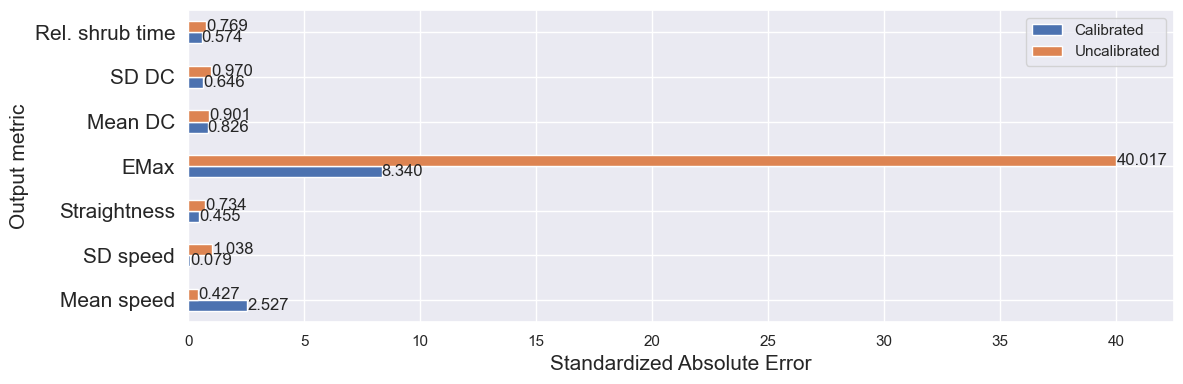

In [15]:
# plot initial searching errors
plot_bars_rmse(df, 'calibrated_rmse_searching', 'uncalibrated_rmse_searching', 'Simple Error', 'validation_results/initial_searchig_rmse.pdf', True, 'symlog', relative=False)
plot_bars_rmse(sdnrmse_df, 'calibrated_sdnrmse_searching', 'uncalibrated_sdnrmse_searching', 'Standardized Absolute Error', 'validation_results/initial_search_sd_nrmse.pdf', False, (0,42.5))

### Oriented Search Errors

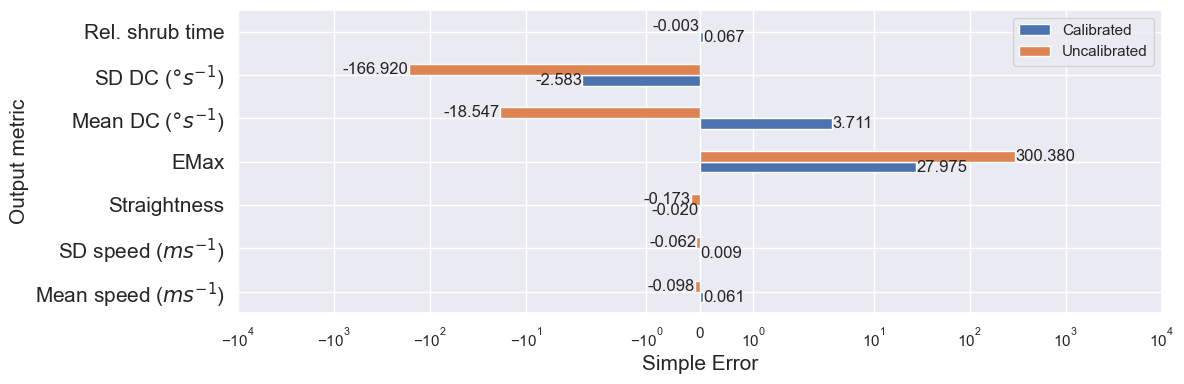

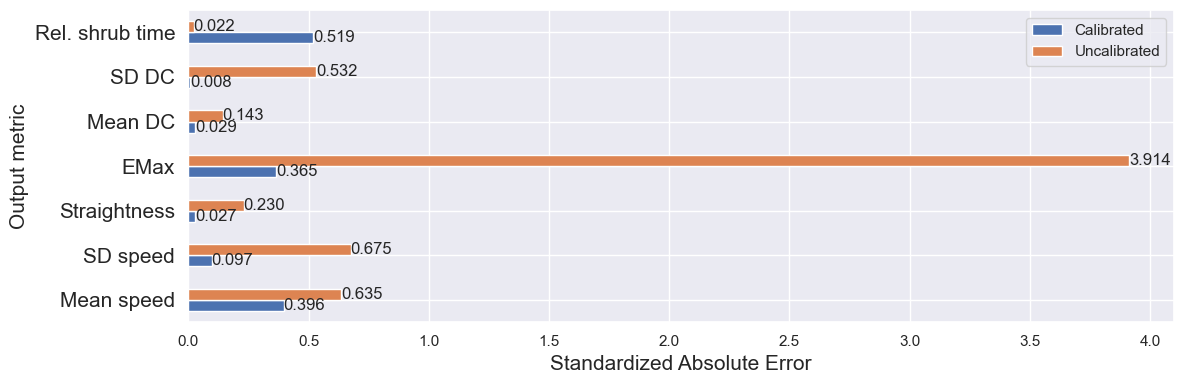

In [16]:
# plot oriented search errors

plot_bars_rmse(df, 'calibrated_rmse_oriented', 'uncalibrated_rmse_oriented', 'Simple Error', 'validation_results/oriented_rmse.pdf', True, 'symlog', relative=False)
plot_bars_rmse(sdnrmse_df, 'calibrated_sdnrmse_oriented', 'uncalibrated_sdnrmse_oriented', 'Standardized Absolute Error', 'validation_results/oriented_sd_nrmse.pdf', False, (0,4.1))

### Homing Errors

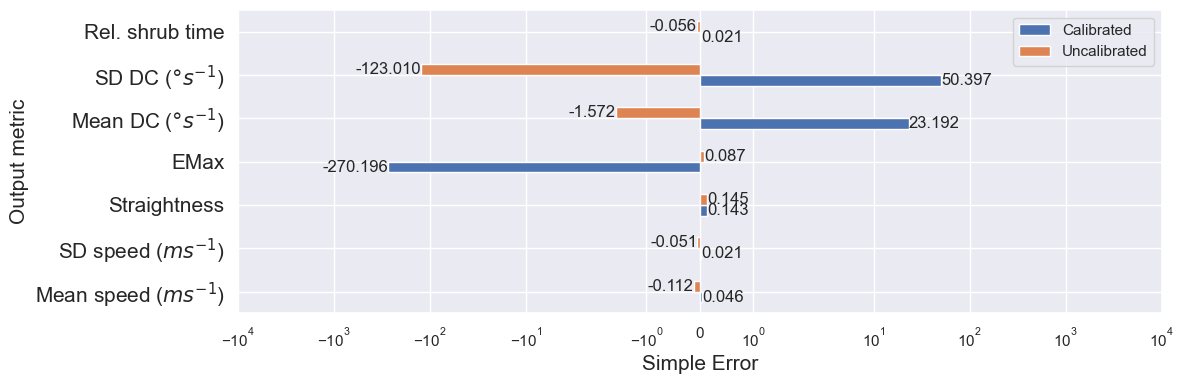

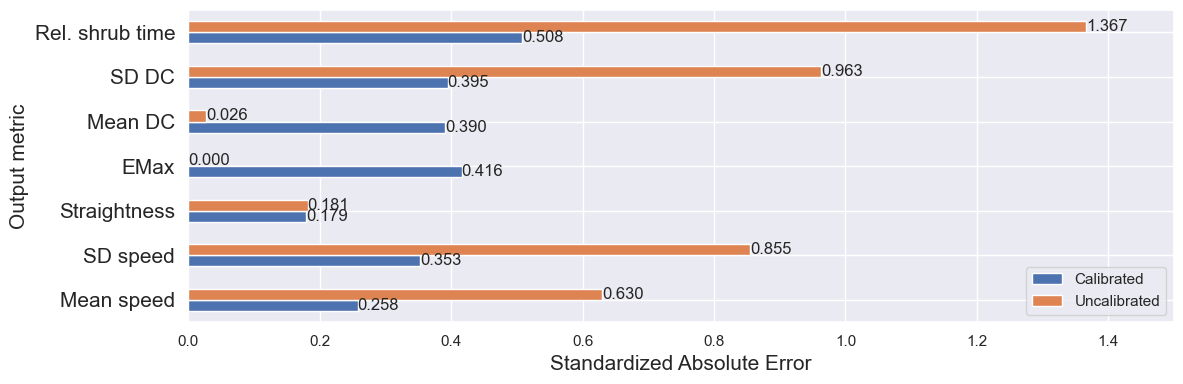

In [17]:
# plot homing errors
plot_bars_rmse(df, 'calibrated_rmse_homing', 'uncalibrated_rmse_homing', 'Simple Error', 'validation_results/homing_rmse.pdf', True, 'symlog', relative=False)
plot_bars_rmse(sdnrmse_df, 'calibrated_sdnrmse_homing', 'uncalibrated_sdnrmse_homing', 'Standardized Absolute Error', 'validation_results/homing_sd_nrmse.pdf', False, (0,1.5) )